In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
data = pd.read_csv("lengthofstay_updated.csv", index_col=0)
data.head()

,eid,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,...,respiration,secondary diagnosis nonicd9,facid,day,year,discharged_month,discharged_day,discharged_year,month,lengthofstay
0,1,0,0,0,0,0,0,0,0,0,...,6.5,4,1,29,2012,9,1,2012,8,3
1,2,5,0,0,0,0,0,0,0,0,...,6.5,1,0,26,2012,6,2,2012,5,7
2,3,1,0,0,0,0,0,0,0,0,...,6.5,2,1,22,2012,9,25,2012,9,3
3,4,0,0,0,0,0,0,0,0,0,...,6.5,1,0,9,2012,8,10,2012,8,1
4,5,0,0,0,0,0,1,0,1,0,...,5.6,2,4,20,2012,12,24,2012,12,4


In [26]:
data=data.drop(columns=['eid'])

In [30]:
from sklearn.model_selection import train_test_split
dev_data, final_test = train_test_split(data, test_size=0.2, random_state=42)

In [31]:
print(f"Total samples: {len(data)}")
print(f"Model development samples: {len(dev_data)}")
print(f"Final test samples: {len(final_test)}")

Total samples: 100000
Model development samples: 80000
Final test samples: 20000


In [32]:
print(dev_data.columns)

Index(['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef',
       'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress',
       'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit',
       'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine',
       'bmi', 'pulse', 'respiration', 'secondary  diagnosis nonicd9', 'facid',
       'day', 'year', 'discharged_month', 'discharged_day', 'discharged_year',
       'month', 'lengthofstay'],
      dtype='object')


In [33]:
len(dev_data);

In [34]:
print(dev_data);

       rcount  gender  dialysisrenalendstage  asthma  irondef  pneum  \
75220       3       1                      0       0        0      0   
48955       5       1                      0       0        0      0   
44966       4       0                      0       0        0      0   
13568       0       1                      0       0        0      0   
92727       4       0                      0       0        0      0   
...       ...     ...                    ...     ...      ...    ...   
6265        0       1                      0       0        0      0   
54886       4       0                      0       0        0      0   
76820       5       0                      0       0        0      0   
860         0       0                      0       0        0      0   
15795       0       1                      0       0        0      0   

       substancedependence  psychologicaldisordermajor  depress  psychother  \
75220                    0                           0  

In [35]:
dev_data.describe()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,respiration,secondary diagnosis nonicd9,facid,day,year,discharged_month,discharged_day,discharged_year,month,lengthofstay
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,1.117375,0.424475,0.036312,0.034975,0.094750,0.039350,0.062350,0.239325,0.052025,0.049212,...,6.491869,2.118325,1.757187,15.693725,2012.002550,6.506725,15.737637,2012.013600,6.509575,4.001762
std,1.541923,0.494266,0.187068,0.183718,0.292871,0.194427,0.241792,0.426674,0.222079,0.216313,...,0.568923,2.047010,1.647768,8.817277,0.050433,3.456165,8.799741,0.115824,3.455652,2.364747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.000000,0.000000,1.000000,2012.000000,1.000000,1.000000,2012.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.500000,1.000000,0.000000,8.000000,2012.000000,3.000000,8.000000,2012.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.500000,1.000000,1.000000,16.000000,2012.000000,7.000000,16.000000,2012.000000,7.000000,4.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.500000,3.000000,4.000000,23.000000,2012.000000,10.000000,23.000000,2012.000000,10.000000,6.000000
max,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,10.000000,4.000000,31.000000,2013.000000,12.000000,31.000000,2013.000000,12.000000,17.000000


In [36]:
import matplotlib.pyplot as plt

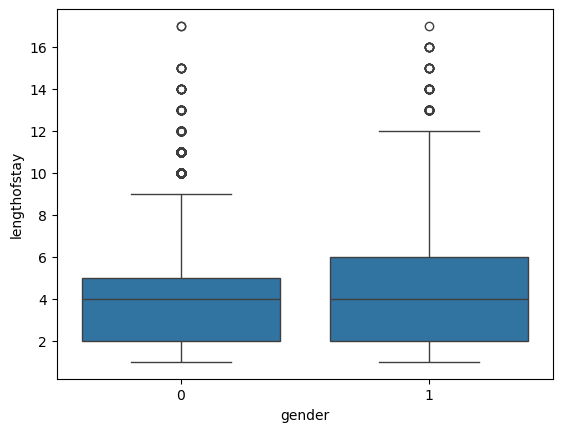

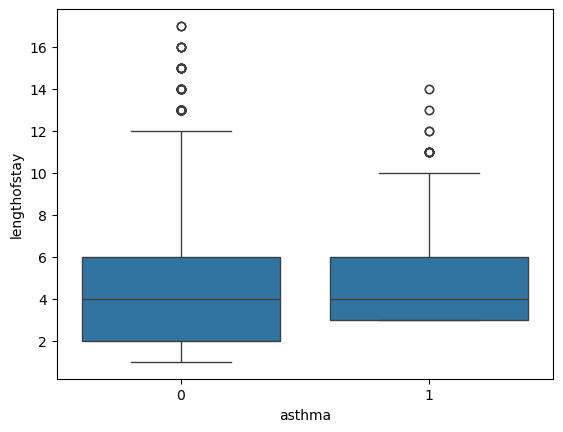

In [37]:
sns.boxplot(x='gender', y='lengthofstay', data=dev_data)
plt.show()

sns.boxplot(x='asthma', y='lengthofstay', data=dev_data)
plt.show()

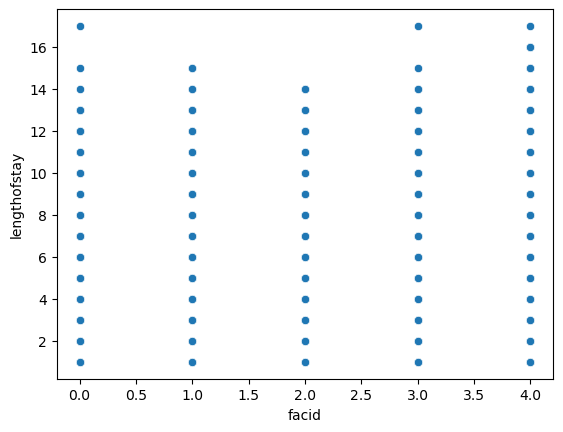

In [38]:
sns.scatterplot(x='facid', y='lengthofstay', data=dev_data)
plt.show()

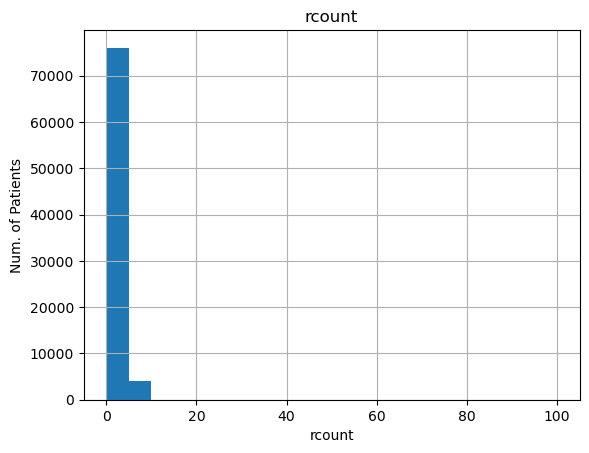

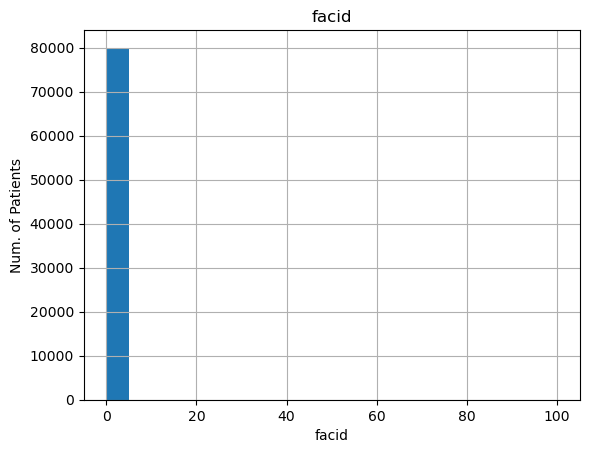

In [39]:
age_histogram = dev_data.hist(column='rcount', bins=20, range=[0, 100])
for ax in age_histogram.flatten():
    ax.set_xlabel("rcount")
    ax.set_ylabel("Num. of Patients")
    
age_LOS = dev_data.hist(column='facid', bins=20, range=[0, 100])
for ax in age_LOS.flatten():
    ax.set_xlabel("facid")
    ax.set_ylabel("Num. of Patients")

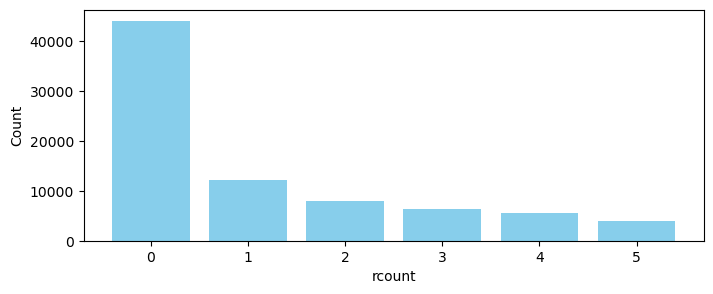

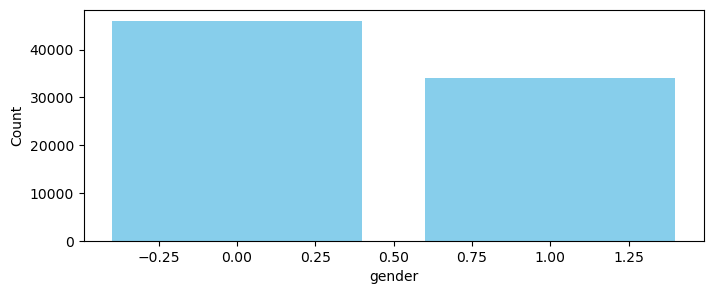

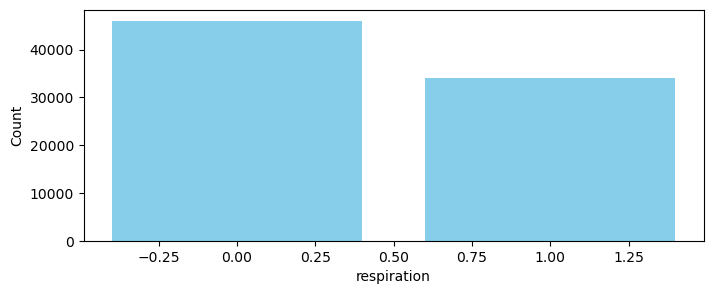

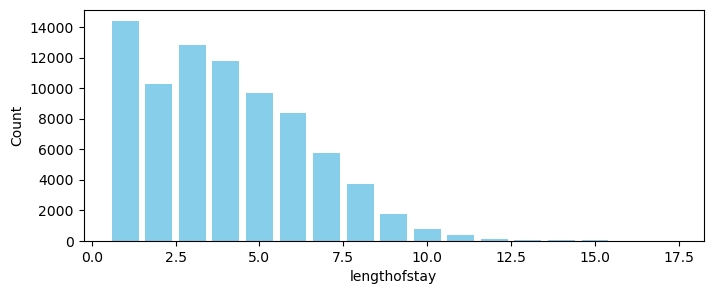

In [40]:
rcount_count = dev_data['rcount'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(rcount_count.index, rcount_count.values, width=0.8, color="skyblue")
plt.xlabel("rcount")
plt.ylabel("Count")
plt.show()

gender_count = dev_data['gender'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(gender_count.index, gender_count.values, width=0.8, color="skyblue")
plt.xlabel("gender")
plt.ylabel("Count")
plt.show()

respiration_count = dev_data['respiration'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(gender_count.index, gender_count.values, width=0.8, color="skyblue")
plt.xlabel("respiration")
plt.ylabel("Count")
plt.show()
lengthofstay_count = dev_data['lengthofstay'].value_counts().sort_index()
plt.figure(figsize = (8, 3))
plt.bar(lengthofstay_count.index, lengthofstay_count.values, width=0.8, color="skyblue")
plt.xlabel("lengthofstay")
plt.ylabel("Count")
plt.show()

In [41]:
x = dev_data.drop(columns=["lengthofstay"])
y = dev_data["lengthofstay"]
print(x.head())
print(y.head())

       rcount  gender  dialysisrenalendstage  asthma  irondef  pneum  \
75220       3       1                      0       0        0      0   
48955       5       1                      0       0        0      0   
44966       4       0                      0       0        0      0   
13568       0       1                      0       0        0      0   
92727       4       0                      0       0        0      0   

       substancedependence  psychologicaldisordermajor  depress  psychother  \
75220                    0                           0        0           0   
48955                    0                           0        0           0   
44966                    0                           0        0           0   
13568                    0                           1        0           0   
92727                    0                           0        0           0   

       ...  pulse  respiration  secondary  diagnosis nonicd9  facid  day  \
75220  ...     7

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions
y_pred = model.predict(x_test)
print("Predicted values for test set:", y_pred)

# Evaluate model performance
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)


Model Coefficients: [ 3.87242017e-02  3.12907147e-03  2.28356371e-02  1.76224628e-02
  2.26438173e-02  1.91302397e-02  1.79517733e-02  2.59854014e-02
  1.81378063e-02  1.10388673e-02  1.91162042e-02  1.84476956e-02
  4.31394825e-02  5.42630470e-04  9.26787230e-04 -5.97893288e-05
  1.64160507e-05  3.79751655e-04  8.91044688e-05  8.28595733e-06
 -3.02373979e-05 -1.49565281e-03  1.26211823e-04  6.85467600e-03
 -9.65414436e-01 -3.53680895e+02  2.94321635e+01  9.65846679e-01
  3.53695394e+02 -2.94310174e+01]
Intercept: -29.128326332055032
Predicted values for test set: [4.0540025  1.03569588 4.01255339 ... 8.030447   3.94034321 2.99976197]
Mean Squared Error (MSE): 0.04957629172960731
R-squared (R²) Score: 0.9909898214074329


In [45]:
x = final_test.drop(columns=["lengthofstay"])
y = final_test["lengthofstay"]
#print(x.head())
#print(y.head())

y_pred1 = model.predict(x)

# 3. Calculate performance metrics
mse=mean_squared_error(y, y_pred1)
rmse = np.sqrt(mean_squared_error(y, y_pred1))
r2 = r2_score(y, y_pred1)

print("Final Test Performance:")
print(f"Mean Absolute Error (MAE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Final Test Performance:
Mean Absolute Error (MAE): 0.0482
Root Mean Squared Error (RMSE): 0.2195
R^2 Score: 0.9912


In [46]:
x = final_test.drop(columns=["lengthofstay"])
y = final_test["lengthofstay"]

# Get the first row (as a 2D array for prediction)
first_row_features = x.iloc[[4]]  # Keep it 2D
true_value = y.iloc[4]            # Actual length of stay (for comparison)

# Predict using the trained model
predicted_value = model.predict(first_row_features)[0]

# Output the results
print("Testing model on the first row of final test data:")
print(f"Predicted Length of Stay: {predicted_value:.2f}")
print(f"Actual Length of Stay:    {true_value:.2f}")

Testing model on the first row of final test data:
Predicted Length of Stay: 5.02
Actual Length of Stay:    5.00


In [47]:
import joblib

# Replace `model` with your trained model variable
joblib.dump(model, 'model.pkl')


['model.pkl']

In [48]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: fastapi in c:\users\molla\anaconda3\lib\site-packages (from -r requirements.txt (line 1)) (0.115.12)



In [51]:
first_row = final_test.iloc[10]
print(first_row)


rcount                             4.000000
gender                             0.000000
dialysisrenalendstage              0.000000
asthma                             0.000000
irondef                            0.000000
pneum                              0.000000
substancedependence                0.000000
psychologicaldisordermajor         0.000000
depress                            0.000000
psychother                         0.000000
fibrosisandother                   0.000000
malnutrition                       0.000000
hemo                               1.000000
hematocrit                         7.300000
neutrophils                        3.800000
sodium                           136.075138
glucose                          154.756375
bloodureanitro                    22.000000
creatinine                         0.942433
bmi                               28.371450
pulse                             48.000000
respiration                        6.500000
secondary  diagnosis nonicd9    